# **End-to-End Object Detection with TRansformers-DETR**

### Downloading the COCO dataset

In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-07-17 16:47:51--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.165.73, 52.217.236.41, 52.217.194.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.165.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  19.4MB/s    in 16m 13s 

2024-07-17 17:04:05 (19.0 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-07-17 17:04:05--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.165.179, 3.5.29.136, 54.231.224.1, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.165.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[=========

In [2]:
from zipfile import ZipFile, BadZipFile
import os

def extract_zip_file(extract_path, zip_path):
    try:
        with ZipFile(zip_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{zip_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)

    except BadZipFile as e:
        print("Error:", e)

extract_train_path = "./coco_dataset_2017"
zip_train_path = "./coco_train2017"
extract_val_path = "./coco_dataset_2017"
zip_val_path = "./coco_val2017"
extract_ann_path="./coco_dataset_2017"
zip_ann_path = "./coco_ann2017"

extract_zip_file(extract_train_path, zip_train_path)
extract_zip_file(extract_val_path, zip_val_path)
extract_zip_file(extract_ann_path, zip_ann_path)

### Simple Parser for the COCO-Dataset (not used)

In [3]:
'''
from collections import defaultdict
import json
import numpy as np

class COCOParser:
    def __init__(self, anns_file, imgs_dir):
        with open(anns_file, 'r') as f:
            coco = json.load(f)

        self.annIm_dict = defaultdict(list)
        self.cat_dict = {}
        self.annId_dict = {}
        self.im_dict = {}
        self.licenses_dict = {}

        for ann in coco['annotations']:
            self.annIm_dict[ann['image_id']].append(ann)
            self.annId_dict[ann['id']]=ann
        for img in coco['images']:
            self.im_dict[img['id']] = img
        for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
        for license in coco['licenses']:
            self.licenses_dict[license['id']] = license

    def get_imgIds(self):
        return list(self.im_dict.keys())

    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]

    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]

    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]

    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]
  '''

'\nfrom collections import defaultdict\nimport json\nimport numpy as np\n\nclass COCOParser:\n    def __init__(self, anns_file, imgs_dir):\n        with open(anns_file, \'r\') as f:\n            coco = json.load(f)\n\n        self.annIm_dict = defaultdict(list)\n        self.cat_dict = {}\n        self.annId_dict = {}\n        self.im_dict = {}\n        self.licenses_dict = {}\n\n        for ann in coco[\'annotations\']:\n            self.annIm_dict[ann[\'image_id\']].append(ann)\n            self.annId_dict[ann[\'id\']]=ann\n        for img in coco[\'images\']:\n            self.im_dict[img[\'id\']] = img\n        for cat in coco[\'categories\']:\n            self.cat_dict[cat[\'id\']] = cat\n        for license in coco[\'licenses\']:\n            self.licenses_dict[license[\'id\']] = license\n\n    def get_imgIds(self):\n        return list(self.im_dict.keys())\n\n    def get_annIds(self, im_ids):\n        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]\n        return [ann[\

In [4]:
'''
coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="/content/coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)
'''

'\ncoco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"\ncoco_images_dir="/content/coco_val2017/val2017"\ncoco= COCOParser(coco_annotations_file, coco_images_dir)\n'

### Example usage of the dataset with simple Parser

In [5]:
'''
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# define a list of colors for drawing bounding boxes
color_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10

num_imgs_to_disp = 4
total_images = len(coco.get_imgIds()) # total number of images
#print(f"total_images: {total_images}")
sel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]
#print(f"sel_im_idxs: {sel_im_idxs}")

img_ids = coco.get_imgIds()
selected_img_ids = [img_ids[i] for i in sel_im_idxs]
#print(f"selected_img_ids: {selected_img_ids}")

ann_ids = coco.get_annIds(selected_img_ids)
im_licenses = coco.get_imgLicenses(selected_img_ids)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax = ax.ravel()

for i, im in enumerate(selected_img_ids):
    #print(f"i: {i}, im: {im}")
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        #print(f"ann: {ann}")
        bbox = ann['bbox']
        x, y, w, h = [int(b) for b in bbox]
        class_id = ann["category_id"]
        class_name = coco.load_cats(class_id)[0]["name"]
        license = coco.get_imgLicenses(im)[0]["name"]
        color_ = color_list[class_id]
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color_, facecolor='none')

        t_box=ax[i].text(x, y, class_name,  color='red', fontsize=10)
        t_box.set_bbox(dict(boxstyle='square, pad=0',facecolor='white', alpha=0.6, edgecolor='blue'))
        ax[i].add_patch(rect)


    ax[i].axis('off')
    ax[i].imshow(image)
    ax[i].set_xlabel('Longitude')
    ax[i].set_title(f"License: {license}")

plt.tight_layout()
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfrom PIL import Image\nimport numpy as np\n\n# define a list of colors for drawing bounding boxes\ncolor_list = ["pink", "red", "teal", "blue", "orange", "yellow", "black", "magenta","green","aqua"]*10\n\nnum_imgs_to_disp = 4\ntotal_images = len(coco.get_imgIds()) # total number of images\n#print(f"total_images: {total_images}")\nsel_im_idxs = np.random.permutation(total_images)[:num_imgs_to_disp]\n#print(f"sel_im_idxs: {sel_im_idxs}")\n\nimg_ids = coco.get_imgIds()\nselected_img_ids = [img_ids[i] for i in sel_im_idxs]\n#print(f"selected_img_ids: {selected_img_ids}")\n\nann_ids = coco.get_annIds(selected_img_ids)\nim_licenses = coco.get_imgLicenses(selected_img_ids)\n\nfig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))\nax = ax.ravel()\n\nfor i, im in enumerate(selected_img_ids):\n    #print(f"i: {i}, im: {im}")\n    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")\n    ann_ids = coco.get_annIds(im)\n    annotations = coco.load

### CocoApi, taken from the paper

In [6]:
"""
Transforms and data augmentation for both image + bbox.
"""
import random

import PIL
import torchvision.transforms as T
import torchvision.transforms.functional as Func


def crop(image, target, region):
    cropped_image = Func.crop(image, *region)

    target = target.copy()
    i, j, h, w = region

    # should we do something wrt the original size?
    target["size"] = torch.tensor([h, w])

    fields = ["labels", "area", "iscrowd"]

    if "boxes" in target:
        boxes = target["boxes"]
        max_size = torch.as_tensor([w, h], dtype=torch.float32)
        cropped_boxes = boxes - torch.as_tensor([j, i, j, i])
        cropped_boxes = torch.min(cropped_boxes.reshape(-1, 2, 2), max_size)
        cropped_boxes = cropped_boxes.clamp(min=0)
        area = (cropped_boxes[:, 1, :] - cropped_boxes[:, 0, :]).prod(dim=1)
        target["boxes"] = cropped_boxes.reshape(-1, 4)
        target["area"] = area
        fields.append("boxes")

    if "masks" in target:
        # FIXME should we update the area here if there are no boxes?
        target['masks'] = target['masks'][:, i:i + h, j:j + w]
        fields.append("masks")

    # remove elements for which the boxes or masks that have zero area
    if "boxes" in target or "masks" in target:
        # favor boxes selection when defining which elements to keep
        # this is compatible with previous implementation
        if "boxes" in target:
            cropped_boxes = target['boxes'].reshape(-1, 2, 2)
            keep = torch.all(cropped_boxes[:, 1, :] > cropped_boxes[:, 0, :], dim=1)
        else:
            keep = target['masks'].flatten(1).any(1)

        for field in fields:
            target[field] = target[field][keep]

    return cropped_image, target


def hflip(image, target):
    flipped_image = Func.hflip(image)

    w, h = image.size

    target = target.copy()
    if "boxes" in target:
        boxes = target["boxes"]
        boxes = boxes[:, [2, 1, 0, 3]] * torch.as_tensor([-1, 1, -1, 1]) + torch.as_tensor([w, 0, w, 0])
        target["boxes"] = boxes

    if "masks" in target:
        target['masks'] = target['masks'].flip(-1)

    return flipped_image, target


def resize(image, target, size, max_size=None):
    # size can be min_size (scalar) or (w, h) tuple

    def get_size_with_aspect_ratio(image_size, size, max_size=None):
        w, h = image_size
        if max_size is not None:
            min_original_size = float(min((w, h)))
            max_original_size = float(max((w, h)))
            if max_original_size / min_original_size * size > max_size:
                size = int(round(max_size * min_original_size / max_original_size))

        if (w <= h and w == size) or (h <= w and h == size):
            return (h, w)

        if w < h:
            ow = size
            oh = int(size * h / w)
        else:
            oh = size
            ow = int(size * w / h)

        return (oh, ow)

    def get_size(image_size, size, max_size=None):
        if isinstance(size, (list, tuple)):
            return size[::-1]
        else:
            return get_size_with_aspect_ratio(image_size, size, max_size)

    size = get_size(image.size, size, max_size)
    rescaled_image = Func.resize(image, size)

    if target is None:
        return rescaled_image, None

    ratios = tuple(float(s) / float(s_orig) for s, s_orig in zip(rescaled_image.size, image.size))
    ratio_width, ratio_height = ratios

    target = target.copy()
    if "boxes" in target:
        boxes = target["boxes"]
        scaled_boxes = boxes * torch.as_tensor([ratio_width, ratio_height, ratio_width, ratio_height])
        target["boxes"] = scaled_boxes

    if "area" in target:
        area = target["area"]
        scaled_area = area * (ratio_width * ratio_height)
        target["area"] = scaled_area

    h, w = size
    target["size"] = torch.tensor([h, w])

    if "masks" in target:
        target['masks'] = interpolate(
            target['masks'][:, None].float(), size, mode="nearest")[:, 0] > 0.5

    return rescaled_image, target


def pad(image, target, padding):
    # assumes that we only pad on the bottom right corners
    padded_image = Func.pad(image, (0, 0, padding[0], padding[1]))
    if target is None:
        return padded_image, None
    target = target.copy()
    # should we do something wrt the original size?
    target["size"] = torch.tensor(padded_image.size[::-1])
    if "masks" in target:
        target['masks'] = torch.nn.functional.pad(target['masks'], (0, padding[0], 0, padding[1]))
    return padded_image, target


class RandomCrop(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, img, target):
        region = T.RandomCrop.get_params(img, self.size)
        return crop(img, target, region)


class RandomSizeCrop(object):
    def __init__(self, min_size: int, max_size: int):
        self.min_size = min_size
        self.max_size = max_size

    def __call__(self, img: PIL.Image.Image, target: dict):
        w = random.randint(self.min_size, min(img.width, self.max_size))
        h = random.randint(self.min_size, min(img.height, self.max_size))
        region = T.RandomCrop.get_params(img, [h, w])
        return crop(img, target, region)


class CenterCrop(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, img, target):
        image_width, image_height = img.size
        crop_height, crop_width = self.size
        crop_top = int(round((image_height - crop_height) / 2.))
        crop_left = int(round((image_width - crop_width) / 2.))
        return crop(img, target, (crop_top, crop_left, crop_height, crop_width))


class RandomHorizontalFlip(object):
    def __init__(self, p=0.5):
        self.p = p

    def __call__(self, img, target):
        if random.random() < self.p:
            return hflip(img, target)
        return img, target


class RandomResize(object):
    def __init__(self, sizes, max_size=None):
        assert isinstance(sizes, (list, tuple))
        self.sizes = sizes
        self.max_size = max_size

    def __call__(self, img, target=None):
        size = random.choice(self.sizes)
        return resize(img, target, size, self.max_size)


class RandomPad(object):
    def __init__(self, max_pad):
        self.max_pad = max_pad

    def __call__(self, img, target):
        pad_x = random.randint(0, self.max_pad)
        pad_y = random.randint(0, self.max_pad)
        return pad(img, target, (pad_x, pad_y))


class RandomSelect(object):
    """
    Randomly selects between transforms1 and transforms2,
    with probability p for transforms1 and (1 - p) for transforms2
    """
    def __init__(self, transforms1, transforms2, p=0.5):
        self.transforms1 = transforms1
        self.transforms2 = transforms2
        self.p = p

    def __call__(self, img, target):
        if random.random() < self.p:
            return self.transforms1(img, target)
        return self.transforms2(img, target)


class ToTensor(object):
    def __call__(self, img, target):
        return Func.to_tensor(img), target


class RandomErasing(object):

    def __init__(self, *args, **kwargs):
        self.eraser = T.RandomErasing(*args, **kwargs)

    def __call__(self, img, target):
        return self.eraser(img), target


class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image, target=None):
        image = Func.normalize(image, mean=self.mean, std=self.std)
        if target is None:
            return image, None
        target = target.copy()
        h, w = image.shape[-2:]
        if "boxes" in target:
            boxes = target["boxes"]
            boxes = box_xyxy_to_cxcywh(boxes)
            boxes = boxes / torch.tensor([w, h, w, h], dtype=torch.float32)
            target["boxes"] = boxes
        return image, target


class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

    def __repr__(self):
        format_string = self.__class__.__name__ + "("
        for t in self.transforms:
            format_string += "\n"
            format_string += "    {0}".format(t)
        format_string += "\n)"
        return format_string

"""
COCO dataset which returns image_id for evaluation.

Mostly copy-paste from https://github.com/pytorch/vision/blob/13b35ff/references/detection/coco_utils.py
"""
from pathlib import Path

import torch
import torch.utils.data
import torchvision
from pycocotools import mask as coco_mask


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file, transforms, return_masks):
        super(CocoDetection, self).__init__(img_folder, ann_file)
        self._transforms = transforms
        self.prepare = ConvertCocoPolysToMask(return_masks)

    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        img, target = self.prepare(img, target)
        if self._transforms is not None:
            img, target = self._transforms(img, target)
        return img, target

def convert_coco_poly_to_mask(segmentations, height, width):
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = torch.as_tensor(mask, dtype=torch.uint8)
        mask = mask.any(dim=2)
        masks.append(mask)
    if masks:
        masks = torch.stack(masks, dim=0)
    else:
        masks = torch.zeros((0, height, width), dtype=torch.uint8)
    return masks

class ConvertCocoPolysToMask(object):
    def __init__(self, return_masks=False):
        self.return_masks = return_masks

    def __call__(self, image, target):
        w, h = image.size

        image_id = target["image_id"]
        image_id = torch.tensor([image_id])

        anno = target["annotations"]

        anno = [obj for obj in anno if 'iscrowd' not in obj or obj['iscrowd'] == 0]

        boxes = [obj["bbox"] for obj in anno]
        # guard against no boxes via resizing
        boxes = torch.as_tensor(boxes, dtype=torch.float32).reshape(-1, 4)
        boxes[:, 2:] += boxes[:, :2]
        boxes[:, 0::2].clamp_(min=0, max=w)
        boxes[:, 1::2].clamp_(min=0, max=h)

        classes = [obj["category_id"] for obj in anno]
        classes = torch.tensor(classes, dtype=torch.int64)

        if self.return_masks:
            segmentations = [obj["segmentation"] for obj in anno]
            masks = convert_coco_poly_to_mask(segmentations, h, w)

        keypoints = None
        if anno and "keypoints" in anno[0]:
            keypoints = [obj["keypoints"] for obj in anno]
            keypoints = torch.as_tensor(keypoints, dtype=torch.float32)
            num_keypoints = keypoints.shape[0]
            if num_keypoints:
                keypoints = keypoints.view(num_keypoints, -1, 3)

        keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
        boxes = boxes[keep]
        classes = classes[keep]
        if self.return_masks:
            masks = masks[keep]
        if keypoints is not None:
            keypoints = keypoints[keep]

        target = {}
        target["boxes"] = boxes
        target["labels"] = classes
        if self.return_masks:
            target["masks"] = masks
        target["image_id"] = image_id
        if keypoints is not None:
            target["keypoints"] = keypoints

        # for conversion to coco api
        area = torch.tensor([obj["area"] for obj in anno])
        iscrowd = torch.tensor([obj["iscrowd"] if "iscrowd" in obj else 0 for obj in anno])
        target["area"] = area[keep]
        target["iscrowd"] = iscrowd[keep]

        target["orig_size"] = torch.as_tensor([int(h), int(w)])
        target["size"] = torch.as_tensor([int(h), int(w)])

        return image, target

def make_coco_transforms(image_set):

    normalize = Compose([
        ToTensor(),
        Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    scales = [480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800]

    if image_set == 'train':
        return Compose([
            RandomHorizontalFlip(),
            RandomSelect(
                RandomResize(scales, max_size=1333),
                Compose([
                    RandomResize([400, 500, 600]),
                    RandomSizeCrop(384, 600),
                    RandomResize(scales, max_size=1333),
                ])
            ),
            normalize,
        ])

    if image_set == 'val':
        return Compose([
            RandomResize([800], max_size=1333),
            normalize,
        ])

    raise ValueError(f'unknown {image_set}')


def build_coco(image_set, args):
    root = Path(args['coco_path'])
    assert root.exists(), f'provided COCO path {root} does not exist'
    mode = 'instances'
    PATHS = {
        "train": (root / "train2017", root / "annotations" / f'{mode}_train2017.json'),
        "val": (root / "val2017", root / "annotations" / f'{mode}_val2017.json'),
    }

    img_folder, ann_file = PATHS[image_set]
    dataset = CocoDetection(img_folder, ann_file, transforms=make_coco_transforms(image_set), return_masks=False)
    return dataset


def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco


def build_dataset(image_set, args):
    dataset_file = args['dataset_file']
    if dataset_file == 'coco':
        return build_coco(image_set, args)
    raise ValueError(f'dataset {dataset_file} not supported')

In [7]:
"""
COCO evaluator that works in distributed mode.

Mostly copy-paste from https://github.com/pytorch/vision/blob/edfd5a7/references/detection/coco_eval.py
The difference is that there is less copy-pasting from pycocotools
in the end of the file, as python3 can suppress prints with contextlib
"""
import os
import contextlib
import copy
import numpy as np
import torch

from pycocotools.cocoeval import COCOeval
from pycocotools.coco import COCO
import pycocotools.mask as mask_util


class CocoEvaluator(object):
    def __init__(self, coco_gt, iou_types):
        assert isinstance(iou_types, (list, tuple))
        coco_gt = copy.deepcopy(coco_gt)
        self.coco_gt = coco_gt

        self.iou_types = iou_types
        self.coco_eval = {}
        for iou_type in iou_types:
            self.coco_eval[iou_type] = COCOeval(coco_gt, iouType=iou_type)

        self.img_ids = []
        self.eval_imgs = {k: [] for k in iou_types}

    def update(self, predictions):
        img_ids = list(np.unique(list(predictions.keys())))
        self.img_ids.extend(img_ids)

        for iou_type in self.iou_types:
            results = self.prepare(predictions, iou_type)

            # suppress pycocotools prints
            with open(os.devnull, 'w') as devnull:
                with contextlib.redirect_stdout(devnull):
                    coco_dt = COCO.loadRes(self.coco_gt, results) if results else COCO()
            coco_eval = self.coco_eval[iou_type]

            coco_eval.cocoDt = coco_dt
            coco_eval.params.imgIds = list(img_ids)
            img_ids, eval_imgs = evaluate_1(coco_eval)

            self.eval_imgs[iou_type].append(eval_imgs)

    def synchronize_between_processes(self):
        for iou_type in self.iou_types:
            self.eval_imgs[iou_type] = np.concatenate(self.eval_imgs[iou_type], 2)
            create_common_coco_eval(self.coco_eval[iou_type], self.img_ids, self.eval_imgs[iou_type])

    def accumulate(self):
        for coco_eval in self.coco_eval.values():
            coco_eval.accumulate()

    def summarize(self):
        for iou_type, coco_eval in self.coco_eval.items():
            print("IoU metric: {}".format(iou_type))
            coco_eval.summarize()

    def prepare(self, predictions, iou_type):
        if iou_type == "bbox":
            return self.prepare_for_coco_detection(predictions)
        elif iou_type == "segm":
            return self.prepare_for_coco_segmentation(predictions)
        elif iou_type == "keypoints":
            return self.prepare_for_coco_keypoint(predictions)
        else:
            raise ValueError("Unknown iou type {}".format(iou_type))

    def prepare_for_coco_detection(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "bbox": box,
                        "score": scores[k],
                    }
                    for k, box in enumerate(boxes)
                ]
            )
        return coco_results

    def prepare_for_coco_segmentation(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            scores = prediction["scores"]
            labels = prediction["labels"]
            masks = prediction["masks"]

            masks = masks > 0.5

            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            rles = [
                mask_util.encode(np.array(mask[0, :, :, np.newaxis], dtype=np.uint8, order="F"))[0]
                for mask in masks
            ]
            for rle in rles:
                rle["counts"] = rle["counts"].decode("utf-8")

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "segmentation": rle,
                        "score": scores[k],
                    }
                    for k, rle in enumerate(rles)
                ]
            )
        return coco_results

    def prepare_for_coco_keypoint(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()
            keypoints = prediction["keypoints"]
            keypoints = keypoints.flatten(start_dim=1).tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        'keypoints': keypoint,
                        "score": scores[k],
                    }
                    for k, keypoint in enumerate(keypoints)
                ]
            )
        return coco_results


def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)


def merge(img_ids, eval_imgs):
    all_img_ids = all_gather(img_ids)
    all_eval_imgs = all_gather(eval_imgs)

    merged_img_ids = []
    for p in all_img_ids:
        merged_img_ids.extend(p)

    merged_eval_imgs = []
    for p in all_eval_imgs:
        merged_eval_imgs.append(p)

    merged_img_ids = np.array(merged_img_ids)
    merged_eval_imgs = np.concatenate(merged_eval_imgs, 2)

    # keep only unique (and in sorted order) images
    merged_img_ids, idx = np.unique(merged_img_ids, return_index=True)
    merged_eval_imgs = merged_eval_imgs[..., idx]

    return merged_img_ids, merged_eval_imgs


def create_common_coco_eval(coco_eval, img_ids, eval_imgs):
    img_ids, eval_imgs = merge(img_ids, eval_imgs)
    img_ids = list(img_ids)
    eval_imgs = list(eval_imgs.flatten())

    coco_eval.evalImgs = eval_imgs
    coco_eval.params.imgIds = img_ids
    coco_eval._paramsEval = copy.deepcopy(coco_eval.params)


#################################################################
# From pycocotools, just removed the prints and fixed
# a Python3 bug about unicode not defined
#################################################################


def evaluate_1(self):
    '''
    Run per image evaluation on given images and store results (a list of dict) in self.evalImgs
    :return: None
    '''
    p = self.params
    # add backward compatibility if useSegm is specified in params
    if p.useSegm is not None:
        p.iouType = 'segm' if p.useSegm == 1 else 'bbox'
        print('useSegm (deprecated) is not None. Running {} evaluation'.format(p.iouType))
    # print('Evaluate annotation type *{}*'.format(p.iouType))
    p.imgIds = list(np.unique(p.imgIds))
    if p.useCats:
        p.catIds = list(np.unique(p.catIds))
    p.maxDets = sorted(p.maxDets)
    self.params = p

    self._prepare()
    # loop through images, area range, max detection number
    catIds = p.catIds if p.useCats else [-1]

    if p.iouType == 'segm' or p.iouType == 'bbox':
        computeIoU = self.computeIoU
    elif p.iouType == 'keypoints':
        computeIoU = self.computeOks
    self.ious = {
        (imgId, catId): computeIoU(imgId, catId)
        for imgId in p.imgIds
        for catId in catIds}

    evaluateImg = self.evaluateImg
    maxDet = p.maxDets[-1]
    evalImgs = [
        evaluateImg(imgId, catId, areaRng, maxDet)
        for catId in catIds
        for areaRng in p.areaRng
        for imgId in p.imgIds
    ]
    # this is NOT in the pycocotools code, but could be done outside
    evalImgs = np.asarray(evalImgs).reshape(len(catIds), len(p.areaRng), len(p.imgIds))
    self._paramsEval = copy.deepcopy(self.params)
    # toc = time.time()
    # print('DONE (t={:0.2f}s).'.format(toc-tic))
    return p.imgIds, evalImgs

#################################################################
# end of straight copy from pycocotools, just removing the prints
#################################################################

### Some utils for the box operations

In [8]:
"""
Utilities for bounding box manipulation and GIoU.
"""
import torch
from torchvision.ops.boxes import box_area


def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=-1)


def box_xyxy_to_cxcywh(x):
    x0, y0, x1, y1 = x.unbind(-1)
    b = [(x0 + x1) / 2, (y0 + y1) / 2,
         (x1 - x0), (y1 - y0)]
    return torch.stack(b, dim=-1)


# modified from torchvision to also return the union
def box_iou(boxes1, boxes2):
    area1 = box_area(boxes1)
    area2 = box_area(boxes2)

    lt = torch.max(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
    rb = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])  # [N,M,2]

    wh = (rb - lt).clamp(min=0)  # [N,M,2]
    inter = wh[:, :, 0] * wh[:, :, 1]  # [N,M]

    union = area1[:, None] + area2 - inter

    iou = inter / union
    return iou, union


def generalized_box_iou(boxes1, boxes2):
    """
    Generalized IoU from https://giou.stanford.edu/

    The boxes should be in [x0, y0, x1, y1] format

    Returns a [N, M] pairwise matrix, where N = len(boxes1)
    and M = len(boxes2)
    """
    # degenerate boxes gives inf / nan results
    # so do an early check
    assert (boxes1[:, 2:] >= boxes1[:, :2]).all()
    assert (boxes2[:, 2:] >= boxes2[:, :2]).all()
    iou, union = box_iou(boxes1, boxes2)

    lt = torch.min(boxes1[:, None, :2], boxes2[:, :2])
    rb = torch.max(boxes1[:, None, 2:], boxes2[:, 2:])

    wh = (rb - lt).clamp(min=0)  # [N,M,2]
    area = wh[:, :, 0] * wh[:, :, 1]

    return iou - (area - union) / area


def masks_to_boxes(masks):
    """Compute the bounding boxes around the provided masks

    The masks should be in format [N, H, W] where N is the number of masks, (H, W) are the spatial dimensions.

    Returns a [N, 4] tensors, with the boxes in xyxy format
    """
    if masks.numel() == 0:
        return torch.zeros((0, 4), device=masks.device)

    h, w = masks.shape[-2:]

    y = torch.arange(0, h, dtype=torch.float)
    x = torch.arange(0, w, dtype=torch.float)
    y, x = torch.meshgrid(y, x)

    x_mask = (masks * x.unsqueeze(0))
    x_max = x_mask.flatten(1).max(-1)[0]
    x_min = x_mask.masked_fill(~(masks.bool()), 1e8).flatten(1).min(-1)[0]

    y_mask = (masks * y.unsqueeze(0))
    y_max = y_mask.flatten(1).max(-1)[0]
    y_min = y_mask.masked_fill(~(masks.bool()), 1e8).flatten(1).min(-1)[0]

    return torch.stack([x_min, y_min, x_max, y_max], 1)

### Here are defined some Classes and Functions including the **Nasted Tensors**
Nasted Tensors are object composed of a tensor and a mask; they are used to compute features of the images. Actually the masks are used only for a computational purpose, therefore having the aim of making masked attentions.
But in a possible modified architecture, masks can be used for computing segmentation of images.

In **NastedTensor.tensor** there are batched images of shape [batch_size x 3 x H x W]

In **NastedTensor.mask** there is a binary mask of shape [batch_size x H x W]

There are also utility functions that will print information about training in an interactive way and give us the possibility to use a distributed version of the code that increase the computational power of the underlying machine

In [9]:
"""
Misc functions, including distributed helpers.

Mostly copy-paste from torchvision references.
"""
import os
import subprocess
import time
from collections import defaultdict, deque
import datetime
import pickle
from packaging import version
from typing import Optional, List

import torch
import torch.distributed as dist
from torch import Tensor

# needed due to empty tensor bug in pytorch and torchvision 0.5
import torchvision
if version.parse(torchvision.__version__) < version.parse('0.7'):
    from torchvision.ops import _new_empty_tensor
    from torchvision.ops.misc import _output_size


class SmoothedValue(object):
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device='cuda')
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median,
            avg=self.avg,
            global_avg=self.global_avg,
            max=self.max,
            value=self.value)


def all_gather(data):
    """
    Run all_gather on arbitrary picklable data (not necessarily tensors)
    Args:
        data: any picklable object
    Returns:
        list[data]: list of data gathered from each rank
    """
    world_size = get_world_size()
    if world_size == 1:
        return [data]

    # serialized to a Tensor
    buffer = pickle.dumps(data)
    storage = torch.ByteStorage.from_buffer(buffer)
    tensor = torch.ByteTensor(storage).to("cuda")

    # obtain Tensor size of each rank
    local_size = torch.tensor([tensor.numel()], device="cuda")
    size_list = [torch.tensor([0], device="cuda") for _ in range(world_size)]
    dist.all_gather(size_list, local_size)
    size_list = [int(size.item()) for size in size_list]
    max_size = max(size_list)

    # receiving Tensor from all ranks
    # we pad the tensor because torch all_gather does not support
    # gathering tensors of different shapes
    tensor_list = []
    for _ in size_list:
        tensor_list.append(torch.empty((max_size,), dtype=torch.uint8, device="cuda"))
    if local_size != max_size:
        padding = torch.empty(size=(max_size - local_size,), dtype=torch.uint8, device="cuda")
        tensor = torch.cat((tensor, padding), dim=0)
    dist.all_gather(tensor_list, tensor)

    data_list = []
    for size, tensor in zip(size_list, tensor_list):
        buffer = tensor.cpu().numpy().tobytes()[:size]
        data_list.append(pickle.loads(buffer))

    return data_list


def reduce_dict(input_dict, average=True):
    """
    Args:
        input_dict (dict): all the values will be reduced
        average (bool): whether to do average or sum
    Reduce the values in the dictionary from all processes so that all processes
    have the averaged results. Returns a dict with the same fields as
    input_dict, after reduction.
    """
    world_size = get_world_size()
    if world_size < 2:
        return input_dict
    with torch.no_grad():
        names = []
        values = []
        # sort the keys so that they are consistent across processes
        for k in sorted(input_dict.keys()):
            names.append(k)
            values.append(input_dict[k])
        values = torch.stack(values, dim=0)
        dist.all_reduce(values)
        if average:
            values /= world_size
        reduced_dict = {k: v for k, v in zip(names, values)}
    return reduced_dict


class MetricLogger(object):
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError("'{}' object has no attribute '{}'".format(
            type(self).__name__, attr))

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(
                "{}: {}".format(name, str(meter))
            )
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ''
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt='{avg:.4f}')
        data_time = SmoothedValue(fmt='{avg:.4f}')
        space_fmt = ':' + str(len(str(len(iterable)))) + 'd'
        if torch.cuda.is_available():
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}',
                'max mem: {memory:.0f}'
            ])
        else:
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}'
            ])
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time),
                        memory=torch.cuda.max_memory_allocated() / MB))
                else:
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time)))
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print('{} Total time: {} ({:.4f} s / it)'.format(
            header, total_time_str, total_time / len(iterable)))


def collate_fn(batch):
    batch = list(zip(*batch))
    batch[0] = nested_tensor_from_tensor_list(batch[0])
    return tuple(batch)


def _max_by_axis(the_list):
    # type: (List[List[int]]) -> List[int]
    maxes = the_list[0]
    for sublist in the_list[1:]:
        for index, item in enumerate(sublist):
            maxes[index] = max(maxes[index], item)
    return maxes


class NestedTensor(object):
    def __init__(self, tensors, mask: Optional[Tensor]):
        self.tensors = tensors
        self.mask = mask

    def to(self, device):
        # type: (Device) -> NestedTensor # noqa
        cast_tensor = self.tensors.to(device)
        mask = self.mask
        if mask is not None:
            assert mask is not None
            cast_mask = mask.to(device)
        else:
            cast_mask = None
        return NestedTensor(cast_tensor, cast_mask)

    def decompose(self):
        return self.tensors, self.mask

    def __repr__(self):
        return str(self.tensors)


def nested_tensor_from_tensor_list(tensor_list: List[Tensor]):
    # TODO make this more general
    if tensor_list[0].ndim == 3:
        if torchvision._is_tracing():
            # nested_tensor_from_tensor_list() does not export well to ONNX
            # call _onnx_nested_tensor_from_tensor_list() instead
            return _onnx_nested_tensor_from_tensor_list(tensor_list)

        # TODO make it support different-sized images
        max_size = _max_by_axis([list(img.shape) for img in tensor_list])
        # min_size = tuple(min(s) for s in zip(*[img.shape for img in tensor_list]))
        batch_shape = [len(tensor_list)] + max_size
        b, c, h, w = batch_shape
        dtype = tensor_list[0].dtype
        device = tensor_list[0].device
        tensor = torch.zeros(batch_shape, dtype=dtype, device=device)
        mask = torch.ones((b, h, w), dtype=torch.bool, device=device)
        for img, pad_img, m in zip(tensor_list, tensor, mask):
            pad_img[: img.shape[0], : img.shape[1], : img.shape[2]].copy_(img)
            m[: img.shape[1], :img.shape[2]] = False
    else:
        raise ValueError('not supported')
    return NestedTensor(tensor, mask)


# _onnx_nested_tensor_from_tensor_list() is an implementation of
# nested_tensor_from_tensor_list() that is supported by ONNX tracing.
#
# this kind of implementation speed-up the computation over nasted tensors
#
@torch.jit.unused
def _onnx_nested_tensor_from_tensor_list(tensor_list: List[Tensor]) -> NestedTensor:
    max_size = []
    for i in range(tensor_list[0].dim()):
        max_size_i = torch.max(torch.stack([img.shape[i] for img in tensor_list]).to(torch.float32)).to(torch.int64)
        max_size.append(max_size_i)
    max_size = tuple(max_size)

    # work around for
    # pad_img[: img.shape[0], : img.shape[1], : img.shape[2]].copy_(img)
    # m[: img.shape[1], :img.shape[2]] = False
    # which is not yet supported in onnx
    padded_imgs = []
    padded_masks = []
    for img in tensor_list:
        padding = [(s1 - s2) for s1, s2 in zip(max_size, tuple(img.shape))]
        padded_img = torch.nn.functional.pad(img, (0, padding[2], 0, padding[1], 0, padding[0]))
        padded_imgs.append(padded_img)

        m = torch.zeros_like(img[0], dtype=torch.int, device=img.device)
        padded_mask = torch.nn.functional.pad(m, (0, padding[2], 0, padding[1]), "constant", 1)
        padded_masks.append(padded_mask.to(torch.bool))

    tensor = torch.stack(padded_imgs)
    mask = torch.stack(padded_masks)

    return NestedTensor(tensor, mask=mask)


def setup_for_distributed(is_master):
    """
    This function disables printing when not in master process
    """
    import builtins as __builtin__
    builtin_print = __builtin__.print

    def print(*args, **kwargs):
        force = kwargs.pop('force', False)
        if is_master or force:
            builtin_print(*args, **kwargs)

    __builtin__.print = print


def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True


def get_world_size():
    if not is_dist_avail_and_initialized():
        return 1
    return dist.get_world_size()


def get_rank():
    if not is_dist_avail_and_initialized():
        return 0
    return dist.get_rank()


def is_main_process():
    return get_rank() == 0


def save_on_master(*args, **kwargs):
    if is_main_process():
        torch.save(*args, **kwargs)


def init_distributed_mode(args):
    if 'RANK' in os.environ and 'WORLD_SIZE' in os.environ:
        args['rank'] = int(os.environ["RANK"])
        args['world_size'] = int(os.environ['WORLD_SIZE'])
        args['gpu'] = int(os.environ['LOCAL_RANK'])
    elif 'SLURM_PROCID' in os.environ:
        args['rank'] = int(os.environ['SLURM_PROCID'])
        args['gpu'] = args.rank % torch.cuda.device_count()
    else:
        print('Not using distributed mode')
        args['distributed'] = False
        return

    args['distributed'] = True

    torch.cuda.set_device(args['gpu'])
    args['dist_backend'] = 'nccl'
    print('| distributed init (rank {}): {}'.format(
               args['rank'], args['dist_url']), flush=True)
    torch.distributed.init_process_group(backend=args['dist_backend'],
                                         init_method=args['dist_url'],
                                         world_size=args['world_size'],
                                         rank=args['rank'])
    torch.distributed.barrier()
    setup_for_distributed(args['rank'] == 0)


@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    if target.numel() == 0:
        return [torch.zeros([], device=output.device)]
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


def interpolate(input, size=None, scale_factor=None, mode="nearest", align_corners=None):
    # type: (Tensor, Optional[List[int]], Optional[float], str, Optional[bool]) -> Tensor
    """
    Equivalent to nn.functional.interpolate, but with support for empty batch sizes.
    This will eventually be supported natively by PyTorch, and this
    class can go away.
    """
    if version.parse(torchvision.__version__) < version.parse('0.7'):
        if input.numel() > 0:
            return torch.nn.functional.interpolate(
                input, size, scale_factor, mode, align_corners
            )

        output_shape = _output_size(2, input, size, scale_factor)
        output_shape = list(input.shape[:-2]) + list(output_shape)
        return _new_empty_tensor(input, output_shape)
    else:
        return torchvision.ops.misc.interpolate(input, size, scale_factor, mode, align_corners)

### Plotting Utilities

In [10]:
"""
Plotting utilities to visualize training logs.
"""
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath


def plot_logs(logs, fields=('class_error', 'loss_bbox_unscaled', 'mAP'), ewm_col=0, log_name='log.txt', type='train'):
    '''
    Function to plot specific fields from training log(s). Plots both training and test results.

    :: Inputs - logs = list containing Path objects, each pointing to individual dir with a log file
              - fields = which results to plot from each log file - plots both training and test for each field.
              - ewm_col = optional, which column to use as the exponential weighted smoothing of the plots
              - log_name = optional, name of log file if different than default 'log.txt'.

    :: Outputs - matplotlib plots of results in fields, color coded for each log file.
               - solid lines are training results, dashed lines are test results.

    '''
    func_name = "plot_utils.py::plot_logs"

    # verify logs is a list of Paths (list[Paths]) or single Pathlib object Path,
    # convert single Path to list to avoid 'not iterable' error

    if not isinstance(logs, list):
        if isinstance(logs, PurePath):
            logs = [logs]
            print(f"{func_name} info: logs param expects a list argument, converted to list[Path].")
        else:
            raise ValueError(f"{func_name} - invalid argument for logs parameter.\n \
            Expect list[Path] or single Path obj, received {type(logs)}")

    # Quality checks - verify valid dir(s), that every item in list is Path object, and that log_name exists in each dir
    for i, dir in enumerate(logs):
        if not isinstance(dir, PurePath):
            raise ValueError(f"{func_name} - non-Path object in logs argument of {type(dir)}: \n{dir}")
        if not dir.exists():
            raise ValueError(f"{func_name} - invalid directory in logs argument:\n{dir}")
        # verify log_name exists
        fn = Path(dir / log_name)
        if not fn.exists():
            print(f"-> missing {log_name} file.  Have you gotten to Epoch 1 in training?")
            print(f"--> full path of missing log file: {fn}")
            return

    # load log file(s) and plot
    dfs = [pd.read_json(Path(p) / log_name, lines=True) for p in logs]

    fig, axs = plt.subplots(ncols=len(fields), figsize=(16, 5))
    fields_dict = {}
    for df, color in zip(dfs, sns.color_palette(n_colors=len(logs))):
        for j, field in enumerate(fields):
            if field == 'mAP':
                coco_eval = pd.DataFrame(
                    np.stack(df.test_coco_eval_bbox.dropna().values)[:, 1]
                ).ewm(com=ewm_col).mean()
                axs[j].plot(coco_eval, c=color)
            else:
                # con pd.to_numeric mi prendo un vettore di 'field' lungo le epoche
                train_elm = pd.to_numeric(df[f'train_{field}'], errors='coerce')
                test_elm = pd.to_numeric(df[f'test_{field}'], errors='coerce')
                transpose = [[row[i] for row in [train_elm, test_elm]] for i in range(len([train_elm, test_elm][0]))]
                axs[j].plot(transpose)
    for ax, field in zip(axs, fields):
        ax.legend([Path(p).name for p in logs])
        ax.set_title(field)


def plot_precision_recall(files, naming_scheme='iter'):
    if naming_scheme == 'exp_id':
        # name becomes exp_id
        names = [f.parts[-3] for f in files]
    elif naming_scheme == 'iter':
        names = [f.stem for f in files]
    else:
        raise ValueError(f'not supported {naming_scheme}')
    fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
    for f, color, name in zip(files, sns.color_palette("Blues", n_colors=len(files)), names):
        data = torch.load(f)
        # precision is n_iou, n_points, n_cat, n_area, max_det
        precision = data['precision']
        recall = data['params'].recThrs
        scores = data['scores']
        # take precision for all classes, all areas and 100 detections
        precision = precision[0, :, :, 0, -1].mean(1)
        scores = scores[0, :, :, 0, -1].mean(1)
        prec = precision.mean()
        rec = data['recall'][0, :, 0, -1].mean()
        print(f'{naming_scheme} {name}: mAP@50={prec * 100: 05.1f}, ' +
              f'score={scores.mean():0.3f}, ' +
              f'f1={2 * prec * rec / (prec + rec + 1e-8):0.3f}'
              )
        axs[0].plot(recall, precision, c=color)
        axs[1].plot(recall, scores, c=color)

    axs[0].set_title('Precision / Recall')
    axs[0].legend(names)
    axs[1].set_title('Scores / Recall')
    axs[1].legend(names)
    return fig, axs

### Transformer Architecture
Is the same one proposed in torch.nn.Transformer with some modifications:
* positional encodings are passed in MHattention
* extra LN at the end of encoder is removed
* decoder returns a stack of activations from all decoding layers  

First we will define the Encoder, next the Decoder and in the end the complete Transformer



In [11]:
# Here are some utility function for Encoder/Decoder layers:
#
# those utilities are used for having a dynamical number of encoders/decoders used in sequence

import torch.nn.functional as F

def _get_activation_fn(activation):
    """Return an activation function given a string"""
    if activation == "relu":
        return F.relu
    if activation == "gelu":
        return F.gelu
    if activation == "glu":
        return F.glu
    raise RuntimeError(F"activation should be relu/gelu, not {activation}.")


def _get_clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for i in range(N)])

### Encoder Architecture

In [12]:
import copy
from typing import Optional, List

import torch
import torch.nn.functional as F
from torch import nn, Tensor

class TransformerEncoderLayer(nn.Module):

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1,
                 activation_func="relu", norm_before=False):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        # Implementation of Feedforward model
        self.linear_1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(dim_feedforward, d_model)

        self.norm_1 = nn.LayerNorm(d_model)
        self.norm_2 = nn.LayerNorm(d_model)
        self.dropout_1 = nn.Dropout(dropout)
        self.dropout_2 = nn.Dropout(dropout)

        self.activation = _get_activation_fn(activation_func)
        self.normalize_before = norm_before

    def with_pos_embed(self, tensor, pos: Optional[Tensor]):
        return tensor if pos is None else tensor + pos

    def forward_post(self,
                     src,
                     src_mask: Optional[Tensor] = None,
                     src_key_padding_mask: Optional[Tensor] = None,
                     pos: Optional[Tensor] = None):
        q = k = self.with_pos_embed(src, pos)
        src2 = self.self_attn(q, k, value=src, attn_mask=src_mask,
                              key_padding_mask=src_key_padding_mask)[0]
        src = src + self.dropout_1(src2)
        src = self.norm_1(src)
        src2 = self.linear_2(self.dropout(self.activation(self.linear_1(src))))
        src = src + self.dropout_2(src2)
        src = self.norm_2(src)
        return src

    def forward_pre(self, src,
                    src_mask: Optional[Tensor] = None,
                    src_key_padding_mask: Optional[Tensor] = None,
                    pos: Optional[Tensor] = None):
        src2 = self.norm_1(src)
        q = k = self.with_pos_embed(src2, pos)
        src2 = self.self_attn(q, k, value=src2, attn_mask=src_mask,
                              key_padding_mask=src_key_padding_mask)[0]
        src = src + self.dropout_1(src2)
        src2 = self.norm_2(src)
        src2 = self.linear_2(self.dropout(self.activation(self.linear_1(src2))))
        src = src + self.dropout_2(src2)
        return src

    def forward(self, src,
                src_mask: Optional[Tensor] = None,
                src_key_padding_mask: Optional[Tensor] = None,
                pos: Optional[Tensor] = None):
        if self.normalize_before:
            return self.forward_pre(src, src_mask, src_key_padding_mask, pos)
        return self.forward_post(src, src_mask, src_key_padding_mask, pos)


class TransformerEncoder(nn.Module):

    def __init__(self, encoder_layer, num_layers, norm=None):
        super().__init__()
        self.encoderLayers = _get_clones(encoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, src,
                mask: Optional[Tensor] = None,
                src_key_padding_mask: Optional[Tensor] = None,
                pos: Optional[Tensor] = None):
        output = src

        for encoderLayer in self.encoderLayers:
            output = encoderLayer(output, src_mask=mask,
                          src_key_padding_mask=src_key_padding_mask, pos=pos)

        if self.norm is not None:
            output = self.norm(output)

        return output



### Decoder Architecture

In [13]:
class TransformerDecoderLayer(nn.Module):

    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1,
                 activation_func="relu", normalize_before=False):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.multihead_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        # Implementation of Feedforward model
        self.linear_1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(dim_feedforward, d_model)

        self.norm_1 = nn.LayerNorm(d_model)
        self.norm_2 = nn.LayerNorm(d_model)
        self.norm_3 = nn.LayerNorm(d_model)
        self.dropout_1 = nn.Dropout(dropout)
        self.dropout_2 = nn.Dropout(dropout)
        self.dropout_3 = nn.Dropout(dropout)

        self.activation = _get_activation_fn(activation_func)
        self.normalize_before = normalize_before

    def with_pos_embed(self, tensor, pos: Optional[Tensor]):
        return tensor if pos is None else tensor + pos

    def forward_post(self, tgt, memory,
                     tgt_mask: Optional[Tensor] = None,
                     memory_mask: Optional[Tensor] = None,
                     tgt_key_padding_mask: Optional[Tensor] = None,
                     memory_key_padding_mask: Optional[Tensor] = None,
                     pos: Optional[Tensor] = None,
                     query_pos: Optional[Tensor] = None):
        q = k = self.with_pos_embed(tgt, query_pos)
        tgt2 = self.self_attn(q, k, value=tgt, attn_mask=tgt_mask,
                              key_padding_mask=tgt_key_padding_mask)[0]
        tgt = tgt + self.dropout_1(tgt2)
        tgt = self.norm_1(tgt)
        tgt2 = self.multihead_attn(query=self.with_pos_embed(tgt, query_pos),
                                   key=self.with_pos_embed(memory, pos),
                                   value=memory, attn_mask=memory_mask,
                                   key_padding_mask=memory_key_padding_mask)[0]
        tgt = tgt + self.dropout_2(tgt2)
        tgt = self.norm_2(tgt)
        tgt2 = self.linear_2(self.dropout(self.activation(self.linear_1(tgt))))
        tgt = tgt + self.dropout_3(tgt2)
        tgt = self.norm_3(tgt)
        return tgt

    def forward_pre(self, tgt, memory,
                    tgt_mask: Optional[Tensor] = None,
                    memory_mask: Optional[Tensor] = None,
                    tgt_key_padding_mask: Optional[Tensor] = None,
                    memory_key_padding_mask: Optional[Tensor] = None,
                    pos: Optional[Tensor] = None,
                    query_pos: Optional[Tensor] = None):
        tgt2 = self.norm_1(tgt)
        q = k = self.with_pos_embed(tgt2, query_pos)
        tgt2 = self.self_attn(q, k, value=tgt2, attn_mask=tgt_mask,
                              key_padding_mask=tgt_key_padding_mask)[0]
        tgt = tgt + self.dropout_1(tgt2)
        tgt2 = self.norm_2(tgt)
        tgt2 = self.multihead_attn(query=self.with_pos_embed(tgt2, query_pos),
                                   key=self.with_pos_embed(memory, pos),
                                   value=memory, attn_mask=memory_mask,
                                   key_padding_mask=memory_key_padding_mask)[0]
        tgt = tgt + self.dropout_2(tgt2)
        tgt2 = self.norm_3(tgt)
        tgt2 = self.linear_2(self.dropout(self.activation(self.linear_1(tgt2))))
        tgt = tgt + self.dropout_3(tgt2)
        return tgt

    def forward(self, tgt, memory,
                tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None,
                pos: Optional[Tensor] = None,
                query_pos: Optional[Tensor] = None):
        if self.normalize_before:
            return self.forward_pre(tgt, memory, tgt_mask, memory_mask,
                                    tgt_key_padding_mask, memory_key_padding_mask, pos, query_pos)
        return self.forward_post(tgt, memory, tgt_mask, memory_mask,
                                 tgt_key_padding_mask, memory_key_padding_mask, pos, query_pos)


class TransformerDecoder(nn.Module):

    def __init__(self, decoder_layer, num_layers, norm=None):
        super().__init__()
        self.decoderLayers = _get_clones(decoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, tgt, memory,
                tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None,
                pos: Optional[Tensor] = None,
                query_pos: Optional[Tensor] = None):

        output = tgt

        for decoderLayer in self.decoderLayers:
            output = decoderLayer(output, memory, tgt_mask=tgt_mask,
                           memory_mask=memory_mask,
                           tgt_key_padding_mask=tgt_key_padding_mask,
                           memory_key_padding_mask=memory_key_padding_mask,
                           pos=pos, query_pos=query_pos)

        if self.norm is not None:
            output = self.norm(output)

        return output.unsqueeze(0)



### Transformer Architecture

In [14]:
"""

Transformer class.

"""

class Transformer(nn.Module):

    def __init__(self, d_model=512, nhead=8, num_encoder_layers=6,
                 num_decoder_layers=6, dim_feedforward=2048, dropout=0.1,
                 activation="relu", normalize_before=False):
        super().__init__()

        # defining the type of encoder
        encoder_Layer = TransformerEncoderLayer(d_model, nhead, dim_feedforward,
                                                dropout, activation, normalize_before)
        if normalize_before:
            encoder_norm = nn.LayerNorm(d_model)
        else:
            encoder_norm = None

        # defining the block of ENCODERS
        self.encoder_block = TransformerEncoder(encoder_Layer, num_encoder_layers, encoder_norm)

        # defining the type of decoder
        decoder_Layer = TransformerDecoderLayer(d_model, nhead, dim_feedforward,
                                                dropout, activation, normalize_before)
        decoder_norm = nn.LayerNorm(d_model)

        # defining the block of DECODERS
        self.decoder_block = TransformerDecoder(decoder_Layer, num_decoder_layers,
                                                decoder_norm,)

        self._reset_parameters()

        self.d_model = d_model
        self.nhead = nhead

    def _reset_parameters(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self, src, mask, query_embed, pos_embed):
        # flatten: NxCxHxW -----> HWxNxC
        bs, c, h, w = src.shape
        src = src.flatten(2).permute(2, 0, 1)
        pos_embed = pos_embed.flatten(2).permute(2, 0, 1)
        query_embed = query_embed.unsqueeze(1).repeat(1, bs, 1)
        mask = mask.flatten(1)

        tgt = torch.zeros_like(query_embed)
        memory = self.encoder_block(src, src_key_padding_mask=mask, pos=pos_embed)
        hs = self.decoder_block(tgt, memory, memory_key_padding_mask=mask,
                          pos=pos_embed, query_pos=query_embed)
        return hs.transpose(1, 2), memory.permute(1, 2, 0).view(bs, c, h, w)



def build_transformer(args):
    return Transformer(
        d_model=args['hidden_dim'],
        dropout=args['dropout'],
        nhead=args['nheads'],
        dim_feedforward=args['dim_feedforward'],
        num_encoder_layers=args['enc_layers'],
        num_decoder_layers=args['dec_layers'],
        normalize_before=args['pre_norm'],
    )



In the layer architecture, both for Encoder and Decoder, are implemented 2 ways to do the forward step:
   * the first one is the *forward_post* where the Normalization is done after SAL/MHA/FFN layers
   * the second one is the *forward_pre* where the Normalization is done before SAL/MHA/FFN layers

In this way we can analyze different architectures and, by comparing them, analyze which one performs better

To implement the Backbone part we need some utility functions, including the part that links the Backbone and the Transformer where there is also the positional embedding.

### Positional Embedding
( used the one proposed in the paper )

In [15]:
import math
import torch
from torch import nn

class PositionEmbeddingSine(nn.Module):
    def __init__(self, num_pos_feats=64, temperature=10000, normalize=False, scale=None):
        super().__init__()
        self.num_pos_feats = num_pos_feats
        self.temperature = temperature
        self.normalize = normalize
        if scale is not None and normalize is False:
            print("normalize should be True if scale is passed")
        if scale is None:
            scale = 2 * math.pi
        self.scale = scale

    def forward(self, tensor_list: NestedTensor):
        x = tensor_list.tensors
        mask = tensor_list.mask
        assert mask is not None
        not_mask = ~mask
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)
        if self.normalize:
            eps = 1e-6
            y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
            x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

        dim_t = torch.arange(self.num_pos_feats, dtype=torch.float32, device=x.device)
        dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)

        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t
        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)
        return pos


class PositionEmbeddingLearned(nn.Module):
    """
    Absolute pos embedding, learned.
    """
    def __init__(self, num_pos_feats=256):
        super().__init__()
        self.row_embed = nn.Embedding(50, num_pos_feats)
        self.col_embed = nn.Embedding(50, num_pos_feats)
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.uniform_(self.row_embed.weight)
        nn.init.uniform_(self.col_embed.weight)

    def forward(self, tensor_list: NestedTensor):
        x = tensor_list.tensors
        h, w = x.shape[-2:]
        i = torch.arange(w, device=x.device)
        j = torch.arange(h, device=x.device)
        x_emb = self.col_embed(i)
        y_emb = self.row_embed(j)
        pos = torch.cat([
            x_emb.unsqueeze(0).repeat(h, 1, 1),
            y_emb.unsqueeze(1).repeat(1, w, 1),
        ], dim=-1).permute(2, 0, 1).unsqueeze(0).repeat(x.shape[0], 1, 1, 1)
        return pos


def build_position_encoding(type_of_encoding, hidden_dim):
    N_steps = hidden_dim // 2
    if type_of_encoding in ('v2', 'sine'):
        position_embedding = PositionEmbeddingSine(N_steps, normalize=True)
    elif type_of_encoding in ('v3', 'learned'):
        position_embedding = PositionEmbeddingLearned(N_steps)
    else:
        print(f"not supported {type_of_encoding}")

    return position_embedding

### Backbone Architecture
ResNet18 architecture is used to perform the computation of image features

### Backbone Architecture with FrozenBachNorm2d layers and with pretrained weights

In [16]:
"""
Backbone modules.
"""
from collections import OrderedDict
import torchvision
from torch import nn
from torchvision.models._utils import IntermediateLayerGetter
from typing import Dict, List

class FrozenBatchNorm2d(torch.nn.Module):
    """
    BatchNorm2d where the batch statistics and the affine parameters are fixed.

    Copy-paste from torchvision.misc.ops with added eps before rqsrt,
    without which any other models than torchvision.models.resnet[18,34,50,101]
    produce nans.
    """

    def __init__(self, n):
        super(FrozenBatchNorm2d, self).__init__()
        self.register_buffer("weight", torch.ones(n))
        self.register_buffer("bias", torch.zeros(n))
        self.register_buffer("running_mean", torch.zeros(n))
        self.register_buffer("running_var", torch.ones(n))

    def _load_from_state_dict(self, state_dict, prefix, local_metadata, strict,
                              missing_keys, unexpected_keys, error_msgs):
        num_batches_tracked_key = prefix + 'num_batches_tracked'
        if num_batches_tracked_key in state_dict:
            del state_dict[num_batches_tracked_key]

        super(FrozenBatchNorm2d, self)._load_from_state_dict(
            state_dict, prefix, local_metadata, strict,
            missing_keys, unexpected_keys, error_msgs)

    def forward(self, x):
        # move reshapes to the beginning
        # to make it fuser-friendly
        w = self.weight.reshape(1, -1, 1, 1)
        b = self.bias.reshape(1, -1, 1, 1)
        rv = self.running_var.reshape(1, -1, 1, 1)
        rm = self.running_mean.reshape(1, -1, 1, 1)
        eps = 1e-5
        scale = w * (rv + eps).rsqrt()
        bias = b - rm * scale
        return x * scale + bias

class Backbone(nn.Module):
    """ResNet backbone with frozen BatchNorm."""
    def __init__(self, name: str, train_backbone: bool, dilation: bool):
        super().__init__()
        backbone = getattr(torchvision.models, name)(
                         replace_stride_with_dilation=[False, False, dilation],
                         pretrained=is_main_process(),
                         norm_layer=FrozenBatchNorm2d)

        self.num_channels = 512 if name in ('resnet18', 'resnet34') else 2048

        # the first layer is not trained, only the last 3 layers are trained
        for name, parameter in backbone.named_parameters():
            if not train_backbone or 'layer2' not in name and 'layer3' not in name and 'layer4' not in name:
                parameter.requires_grad_(False)

        # Eventually we can adapt the code to return all the intermediate outputs
        # of the Backbone to look how features will change over layers
        return_layers = {'layer4': "0"}

        self.body = IntermediateLayerGetter(backbone, return_layers=return_layers)

    def forward(self, tensor_list: NestedTensor):
        xs = self.body(tensor_list.tensors)
        out: Dict[str, NestedTensor] = {}
        for layer, x in xs.items():
            m = tensor_list.mask
            assert m is not None
            mask = F.interpolate(m[None].float(), size=x.shape[-2:]).to(torch.bool)[0]
            out[layer] = NestedTensor(x, mask)
        return out

class Joiner(nn.Sequential):
    def __init__(self, backbone, position_embedding):
        super().__init__(backbone, position_embedding)

    def forward(self, tensor_list: NestedTensor):
        featuresNTensors = self[0](tensor_list)
        out: List[NestedTensor] = []
        pos = []
        for layer, Ntensor in featuresNTensors.items():
            out.append(Ntensor)
            # position encoding
            pos.append(self[1](Ntensor).to(Ntensor.tensors.dtype))

        return out, pos


def build_backbone(backbone_args, hidden_dim):

    position_embedding = build_position_encoding(backbone_args['type_of_encoding'], hidden_dim)

    train_backbone = backbone_args['lr_backbone'] > 0

    backbone = Backbone(backbone_args['type_of_backbone'], train_backbone,
                        backbone_args['dilation'])
    print(backbone)

    model = Joiner(backbone, position_embedding)

    model.num_channels = backbone.num_channels
    return model

### DETR Model implementation

In [17]:
import torch
import torch.nn.functional as F
from torch import nn


class DETR(nn.Module):
    """ This is the DETR module that performs object detection """
    def __init__(self, backbone, transformer, num_classes, num_queries):
        """ Initializes the model.
        Parameters:
            backbone: torch module of the backbone to be used.
            transformer: torch module of the transformer architecture.
            num_classes: number of object classes
            num_queries: number of object queries, ie detection slot. This is the maximal number of objects
                         DETR can detect in a single image. For COCO, we recommend 100 queries.
            aux_loss: True if auxiliary decoding losses (loss at each decoder layer) are to be used.
        """
        super().__init__()
        self.num_queries = num_queries
        self.transformer = transformer
        hidden_dim = transformer.d_model
        self.class_embed = nn.Linear(hidden_dim, num_classes + 1)
        self.bbox_embed = MLP(hidden_dim, hidden_dim, 4, 3)
        self.query_embed = nn.Embedding(num_queries, hidden_dim)
        self.input_proj = nn.Conv2d(backbone.num_channels, hidden_dim, kernel_size=1) # to make backbone and transformer's size compatible
        self.backbone = backbone
        print(self.transformer)

    def forward(self, samples: NestedTensor):
        """ The forward expects a NestedTensor, which consists of:
               - samples.tensor: batched images, of shape [batch_size x 3 x H x W]
               - samples.mask: a binary mask of shape [batch_size x H x W], containing 1 on padded pixels

            It returns a dict with the following elements:
               - "pred_logits": the classification logits (including no-object) for all queries.
                                Shape= [batch_size x num_queries x (num_classes + 1)]
               - "pred_boxes": The normalized boxes coordinates for all queries, represented as
                               (center_x, center_y, height, width). These values are normalized in [0, 1],
                               relative to the size of each individual image (disregarding possible padding).
                               See PostProcess for information on how to retrieve the unnormalized bounding box.
        """
        if isinstance(samples, (list, torch.Tensor)):
            samples = nested_tensor_from_tensor_list(samples)
        features, pos = self.backbone(samples)

        src, mask = features[-1].decompose()
        assert mask is not None
        hs = self.transformer(self.input_proj(src), mask, self.query_embed.weight, pos[-1])[0]

        outputs_class = self.class_embed(hs)
        outputs_coord = self.bbox_embed(hs).sigmoid()
        out = {'pred_logits': outputs_class[-1], 'pred_boxes': outputs_coord[-1]}

        return out

### Criterion
this is a special class in which we compute the losses

In [18]:
class SetCriterion(nn.Module):
    """ This class computes the loss for DETR.
    The process happens in two steps:
        1) we compute hungarian assignment between ground truth boxes and the outputs of the model
        2) we supervise each pair of matched ground-truth / prediction (supervise class and box)
    """
    def __init__(self, num_classes, matcher, weight_dict, no_obj_coef, losses):
        """ Create the criterion.
        Parameters:
            num_classes: number of object categories, omitting the special no-object category
            matcher: module able to compute a matching between targets and proposals
            weight_dict: dict containing as key the names of the losses and as values their relative weight.
            no_obj_coef: relative classification weight applied to the no-object category
            losses: list of all the losses to be applied. See get_loss for list of available losses.
        """
        super().__init__()
        self.num_classes = num_classes
        self.matcher = matcher
        self.weight_dict = weight_dict
        self.no_obj_coef = no_obj_coef
        self.losses = losses
        empty_weight = torch.ones(self.num_classes + 1)
        empty_weight[-1] = self.no_obj_coef
        self.register_buffer('empty_weight', empty_weight)

    def loss_labels(self, outputs, targets, indices, num_boxes, log=True):
        """Classification loss (NLL)
        targets dicts must contain the key "labels" containing a tensor of dim [nb_target_boxes]
        """
        assert 'pred_logits' in outputs
        src_logits = outputs['pred_logits']

        idx = self._get_src_permutation_idx(indices)
        target_classes_o = torch.cat([t["labels"][J] for t, (_, J) in zip(targets, indices)])
        target_classes = torch.full(src_logits.shape[:2], self.num_classes,
                                    dtype=torch.int64, device=src_logits.device)
        target_classes[idx] = target_classes_o

        loss_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes)
        losses = {'loss_ce': loss_ce}

        if log:
            # TODO this should probably be a separate loss, not hacked in this one here
            losses['class_error'] = 100 - accuracy(src_logits[idx], target_classes_o)[0]
        return losses

    @torch.no_grad()
    def loss_cardinality(self, outputs, targets, indices, num_boxes):
        """ Compute the cardinality error, ie the absolute error in the number of predicted non-empty boxes
        This is not really a loss, it is intended for logging purposes only. It doesn't propagate gradients
        """
        pred_logits = outputs['pred_logits']
        device = pred_logits.device
        tgt_lengths = torch.as_tensor([len(v["labels"]) for v in targets], device=device)
        # Count the number of predictions that are NOT "no-object" (which is the last class)
        card_pred = (pred_logits.argmax(-1) != pred_logits.shape[-1] - 1).sum(1)
        card_err = F.l1_loss(card_pred.float(), tgt_lengths.float())
        losses = {'cardinality_error': card_err}
        return losses

    def loss_boxes(self, outputs, targets, indices, num_boxes):
        """Compute the losses related to the bounding boxes, the L1 regression loss and the GIoU loss
           targets dicts must contain the key "boxes" containing a tensor of dim [nb_target_boxes, 4]
           The target boxes are expected in format (center_x, center_y, w, h), normalized by the image size.
        """
        assert 'pred_boxes' in outputs
        idx = self._get_src_permutation_idx(indices)
        src_boxes = outputs['pred_boxes'][idx]
        target_boxes = torch.cat([t['boxes'][i] for t, (_, i) in zip(targets, indices)], dim=0)

        loss_bbox = F.l1_loss(src_boxes, target_boxes, reduction='none')

        losses = {}
        losses['loss_bbox'] = loss_bbox.sum() / num_boxes

        loss_giou = 1 - torch.diag(generalized_box_iou(
            box_cxcywh_to_xyxy(src_boxes),
            box_cxcywh_to_xyxy(target_boxes)))
        losses['loss_giou'] = loss_giou.sum() / num_boxes
        return losses

    def loss_masks(self, outputs, targets, indices, num_boxes):
        """Compute the losses related to the masks: the focal loss and the dice loss.
           targets dicts must contain the key "masks" containing a tensor of dim [nb_target_boxes, h, w]
        """
        assert "pred_masks" in outputs

        src_idx = self._get_src_permutation_idx(indices)
        tgt_idx = self._get_tgt_permutation_idx(indices)
        src_masks = outputs["pred_masks"]
        src_masks = src_masks[src_idx]
        masks = [t["masks"] for t in targets]
        # TODO use valid to mask invalid areas due to padding in loss
        target_masks, valid = nested_tensor_from_tensor_list(masks).decompose()
        target_masks = target_masks.to(src_masks)
        target_masks = target_masks[tgt_idx]

        # upsample predictions to the target size
        src_masks = interpolate(src_masks[:, None], size=target_masks.shape[-2:],
                                mode="bilinear", align_corners=False)
        src_masks = src_masks[:, 0].flatten(1)

        target_masks = target_masks.flatten(1)
        target_masks = target_masks.view(src_masks.shape)
        losses = {
            "loss_mask": sigmoid_focal_loss(src_masks, target_masks, num_boxes),
            "loss_dice": dice_loss(src_masks, target_masks, num_boxes),
        }
        return losses

    def _get_src_permutation_idx(self, indices):
        # permute predictions following indices
        batch_idx = torch.cat([torch.full_like(src, i) for i, (src, _) in enumerate(indices)])
        src_idx = torch.cat([src for (src, _) in indices])
        return batch_idx, src_idx

    def _get_tgt_permutation_idx(self, indices):
        # permute targets following indices
        batch_idx = torch.cat([torch.full_like(tgt, i) for i, (_, tgt) in enumerate(indices)])
        tgt_idx = torch.cat([tgt for (_, tgt) in indices])
        return batch_idx, tgt_idx

    def get_loss(self, loss, outputs, targets, indices, num_boxes, **kwargs):
        loss_map = {
            'labels': self.loss_labels,
            'cardinality': self.loss_cardinality,
            'boxes': self.loss_boxes,
            'masks': self.loss_masks
        }
        assert loss in loss_map, f'do you really want to compute {loss} loss?'
        return loss_map[loss](outputs, targets, indices, num_boxes, **kwargs)

    def forward(self, outputs, targets):
        """ This performs the loss computation.
        Parameters:
             outputs: dict of tensors, see the output specification of the model for the format
             targets: list of dicts, such that len(targets) == batch_size.
                      The expected keys in each dict depends on the losses applied, see each loss' doc
        """
        # Retrieve the matching between the outputs of the last layer and the targets
        indices = self.matcher(outputs, targets)

        # Compute the average number of target boxes accross all nodes, for normalization purposes
        num_boxes = sum(len(t["labels"]) for t in targets)
        num_boxes = torch.as_tensor([num_boxes], dtype=torch.float, device=next(iter(outputs.values())).device)

        # The distributed package included in PyTorch (i.e., torch.distributed)
        # enables researchers and practitioners to easily parallelize their
        # computations across processes and clusters of machines.
        if is_dist_avail_and_initialized():
            torch.distributed.all_reduce(num_boxes)
        num_boxes = torch.clamp(num_boxes / get_world_size(), min=1).item()

        # Compute all the requested losses
        losses = {}
        for loss in self.losses:
            losses.update(self.get_loss(loss, outputs, targets, indices, num_boxes))

        return losses

### PostProcess and MLP
The module "PostProcess" converts the model's output into the format expected by the coco api, MLP is a very simple multi-layer perceptron (also called FFN)

In [19]:
class PostProcess(nn.Module):
    @torch.no_grad()
    def forward(self, outputs, target_sizes):
        """ Perform the computation to adapt the output of the model to the input dimensions
        Parameters:
            outputs: raw outputs of the model
            target_sizes: tensor of dimension [batch_size x 2] containing the size of each images of the batch
                          For evaluation, this must be the original image size (before any data augmentation)
                          For visualization, this should be the image size after data augment, but before padding
        """
        out_logits, out_bbox = outputs['pred_logits'], outputs['pred_boxes']

        assert len(out_logits) == len(target_sizes)
        assert target_sizes.shape[1] == 2

        prob = F.softmax(out_logits, -1)
        scores, labels = prob[..., :-1].max(-1)

        # convert to [x0, y0, x1, y1] format
        boxes = box_cxcywh_to_xyxy(out_bbox)
        # and from relative [0, 1] to absolute [0, height] coordinates
        img_h, img_w = target_sizes.unbind(1)
        scale_fct = torch.stack([img_w, img_h, img_w, img_h], dim=1)
        boxes = boxes * scale_fct[:, None, :]

        results = [{'scores': s, 'labels': l, 'boxes': b} for s, l, b in zip(scores, labels, boxes)]

        return results


class MLP(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        self.num_layers = num_layers
        # h = [input, hidden, ... , hidden, output]
        h =[input_dim] + [hidden_dim] * (num_layers - 1) + [output_dim]
        self.layers = nn.ModuleList(nn.Linear(h[i], h[i+1]) for i in range(len(h)-1))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            if i < self.num_layers - 1:
                x = F.relu(layer(x))
            else:
                x = layer(x)
        return x

### Hungarian Matcher
Modules to compute the matching cost and solve the corresponding LSAP

In [20]:
import torch
from scipy.optimize import linear_sum_assignment
from torch import nn

class HungarianMatcher(nn.Module):
    """This class computes an assignment between the targets and the predictions of the network

    For efficiency reasons, the targets don't include the no_object. Because of this, in general,
    there are more predictions than targets. In this case, we do a 1-to-1 matching of the best predictions,
    while the others are un-matched (and thus treated as non-objects).
    """

    def __init__(self, cost_class: float = 1, cost_bbox: float = 1, cost_giou: float = 1):
        """Creates the matcher

        Params:
            cost_class: This is the relative weight of the classification error in the matching cost
            cost_bbox: This is the relative weight of the L1 error of the bounding box coordinates in the matching cost
            cost_giou: This is the relative weight of the giou loss of the bounding box in the matching cost
        """
        super().__init__()
        self.cost_class = cost_class
        self.cost_bbox = cost_bbox
        self.cost_giou = cost_giou
        assert cost_class != 0 or cost_bbox != 0 or cost_giou != 0, "all costs cant be 0"

    @torch.no_grad()
    def forward(self, outputs, targets):
        """ Performs the matching between the model's output dimentions and the target dimentions

        Params:
            outputs: This is a dict that contains at least these entries:
                 "pred_logits": Tensor of dim [batch_size, num_queries, num_classes] with the classification logits
                 "pred_boxes": Tensor of dim [batch_size, num_queries, 4] with the predicted box coordinates

            targets: This is a list of targets (len(targets) = batch_size), where each target is a dict containing:
                 "labels": Tensor of dim [num_target_boxes] (where num_target_boxes is the number of ground-truth
                           objects in the target) containing the class labels
                 "boxes": Tensor of dim [num_target_boxes, 4] containing the target box coordinates

        Returns:
            A list of size batch_size, containing tuples of (index_i, index_j) where:
                - index_i is a vector containing the indices of the selected predictions (in order)
                - index_j is a vector containing the indices of the corresponding selected targets (in order)
            For each batch element, it holds:
                len(index_i) = len(index_j) = min(num_queries, num_target_boxes)
        """
        bs, num_queries = outputs["pred_logits"].shape[:2]

        # We flatten to compute the cost matrices in a batch
        out_prob = outputs["pred_logits"].flatten(0, 1).softmax(-1)  # [batch_size * num_queries, num_classes]
        out_bbox = outputs["pred_boxes"].flatten(0, 1)  # [batch_size * num_queries, 4]

        # Also concat the target labels and boxes
        tgt_ids = torch.cat([v["labels"] for v in targets])
        tgt_bbox = torch.cat([v["boxes"] for v in targets])

        # Compute the classification cost. Contrary to the loss, we don't use the NLL(NegativeLogLikelihood),
        # but approximate it in 1 - proba[target class].
        # The 1 is a constant that doesn't change the matching, it can be ommitted.
        cost_class = -out_prob[:, tgt_ids]

        # Compute the L1 cost between boxes
        cost_bbox = torch.cdist(out_bbox, tgt_bbox, p=1)

        # Compute the giou cost betwen boxes
        cost_giou = -generalized_box_iou(box_cxcywh_to_xyxy(out_bbox), box_cxcywh_to_xyxy(tgt_bbox))

        # Final cost matrix
        C = self.cost_bbox * cost_bbox + self.cost_class * cost_class + self.cost_giou * cost_giou

        # Resizing the Cost matrix and computing the Hungarian assignment
        C = C.view(bs, num_queries, -1).cpu()
        sizes = [len(v["boxes"]) for v in targets]
        indices = [linear_sum_assignment(c[i]) for i, c in enumerate(C.split(sizes, -1))]

        return [(torch.as_tensor(i, dtype=torch.int64), torch.as_tensor(j, dtype=torch.int64)) for i, j in indices]


def build_matcher(matcher_args):
    return HungarianMatcher(cost_class=matcher_args['set_cost_class'],
                            cost_bbox=matcher_args['set_cost_bbox'],
                            cost_giou=matcher_args['set_cost_giou'])

# Training the model

In [21]:
def build(args):
    # the `num_classes` naming here is somewhat misleading.
    # it indeed corresponds to `max_obj_id + 1`, where max_obj_id
    # is the maximum id for a class in your dataset. For example,
    # COCO has a max_obj_id of 90, so we pass `num_classes` to be 91.
    # As another example, for a dataset that has a single class with id 1,
    # you should pass `num_classes` to be 2 (max_obj_id + 1).
    # For more details on this, check the following discussion
    # https://github.com/facebookresearch/detr/issues/108#issuecomment-650269223

    num_Classes = 20 if args["dataset_file"] != 'coco' else 91

    device = torch.device(args["device"])

    backbone = build_backbone(args["backbone"], args["transformer"]['hidden_dim'])

    transformer = build_transformer(args["transformer"])

    model = DETR(
        backbone,
        transformer,
        num_classes=num_Classes,
        num_queries=args["num_queries"],
    )

    Matcher = build_matcher(args["matcher"])
    Weight_dict = {'loss_ce': 1,
                   'loss_bbox': args["bbox_loss_coef"],
                   'loss_giou' : args["giou_loss_coef"]}


    Losses = ['labels', 'boxes', 'cardinality']

    criterion = SetCriterion(args["num_classes"], matcher=Matcher, weight_dict=Weight_dict,
                             no_obj_coef=args["no_obj_coef"], losses=Losses)
    criterion.to(device)
    postprocessor = PostProcess()

    return model, criterion, postprocessor

# Training and Testing

In [22]:
import math
import os
import sys
from typing import Iterable

import torch


def train_one_epoch(model: torch.nn.Module, criterion: torch.nn.Module,
                    data_loader: Iterable, optimizer: torch.optim.Optimizer,
                    device: torch.device, epoch: int, max_norm: float = 0):
    model.train()
    criterion.train()
    metric_logger = MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', SmoothedValue(window_size=1, fmt='{value:.6f}'))
    metric_logger.add_meter('class_error', SmoothedValue(window_size=1, fmt='{value:.2f}'))
    header = 'Epoch: [{}]'.format(epoch)
    print_freq = 1
    i = 0

    for samples, targets in data_loader:
        if i > 9 :
            break
        if i == 0:
            t, m = samples.decompose()
            print(f"samples in a batch: {t.shape[0]}")
        print(f"batch n°{i}")
        i += 1
        samples = samples.to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        outputs = model(samples)
        loss_dict = criterion(outputs, targets)
        weight_dict = criterion.weight_dict
        losses = sum(loss_dict[k] * weight_dict[k] for k in loss_dict.keys() if k in weight_dict)

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = reduce_dict(loss_dict)
        loss_dict_reduced_unscaled = {f'{k}_unscaled': v
                                      for k, v in loss_dict_reduced.items()}
        loss_dict_reduced_scaled = {k: v * weight_dict[k]
                                    for k, v in loss_dict_reduced.items() if k in weight_dict}
        losses_reduced_scaled = sum(loss_dict_reduced_scaled.values())

        loss_value = losses_reduced_scaled.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict_reduced)
            return {"error" : 1 }
        optimizer.zero_grad()
        losses.backward()
        if max_norm > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
        optimizer.step()

        metric_logger.update(loss=loss_value, **loss_dict_reduced_scaled, **loss_dict_reduced_unscaled)
        metric_logger.update(class_error=loss_dict_reduced['class_error'])
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])
    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


@torch.no_grad()
def evaluate(model, criterion, postprocessor, data_loader, base_ds, device, output_dir):
    model.eval()
    criterion.eval()

    metric_logger = MetricLogger(delimiter="  ")
    metric_logger.add_meter('class_error', SmoothedValue(window_size=1, fmt='{value:.2f}'))
    header = 'Test:'
    postprocessors = {"bbox" : postprocessor}
    iou_types = tuple(k for k in ('segm', 'bbox') if k in postprocessors.keys())
    coco_evaluator = CocoEvaluator(base_ds, iou_types)
    i = 0

    for samples, targets in data_loader:
        if i > 0 :
            break
        print(f"evaluating batch n°{i}")
        i += 1
        samples = samples.to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        outputs = model(samples)
        loss_dict = criterion(outputs, targets)
        weight_dict = criterion.weight_dict

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = reduce_dict(loss_dict)
        loss_dict_reduced_scaled = {k: v * weight_dict[k]
                                    for k, v in loss_dict_reduced.items() if k in weight_dict}
        loss_dict_reduced_unscaled = {f'{k}_unscaled': v
                                      for k, v in loss_dict_reduced.items()}
        metric_logger.update(loss=sum(loss_dict_reduced_scaled.values()),
                             **loss_dict_reduced_scaled,
                             **loss_dict_reduced_unscaled)
        metric_logger.update(class_error=loss_dict_reduced['class_error'])

        orig_target_sizes = torch.stack([t["orig_size"] for t in targets], dim=0)
        results = postprocessor(outputs, orig_target_sizes)

        res = {target['image_id'].item(): output for target, output in zip(targets, results)}
        if coco_evaluator is not None:
            coco_evaluator.update(res)

    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    if coco_evaluator is not None:
        coco_evaluator.synchronize_between_processes()

    # accumulate predictions from all images
    if coco_evaluator is not None:
        coco_evaluator.accumulate()
        coco_evaluator.summarize()

    stats = {k: meter.global_avg for k, meter in metric_logger.meters.items()}
    if coco_evaluator is not None:
        stats['coco_eval_bbox'] = coco_evaluator.coco_eval['bbox'].stats.tolist()

    return stats, coco_evaluator

# **HYPER PARAMETERS**

In [23]:
import os

directory_path = '/content/DETR_Output_Stats'
os.makedirs(directory_path, exist_ok=True)

In [24]:
args = {
    "backbone" : {
        'type_of_encoding' : 'sine',
        'lr_backbone' : 0.0001,
        'type_of_backbone' : 'resnet18',
        'dilation' : False,
    },
    "transformer" : {
        'hidden_dim' : 256,
        'dropout' : 0.1,
        'nheads' : 8,
        'dim_feedforward' : 256,
        'enc_layers' : 1,
        'dec_layers' : 1,
        'pre_norm' : True,
    },
    "matcher" : {
        'set_cost_class' : 1,
        'set_cost_bbox' : 5,
        'set_cost_giou' : 2,
    },
    "dataset_file" : 'coco',
    "coco_path" : '/content/coco_dataset_2017',
    "output_dir" : '/content',
    "device" : torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "num_queries" : 100,
    "num_classes" : 90,
    "bbox_loss_coef" : 5,
    "giou_loss_coef" : 2,
    "no_obj_coef" : 0.1,
    "batch_size" : 4,#16,
    "eval" : False,
    "num_workers" : 2,
    "weight_decay" : 1e-4,
    "lr" : 1e-4,
    'save_drop' : 2,
    "output_dir" : '/content/DETR_Output_Stats',
    "dist_url" : 'env://',
    "seed" : 0,
    "resume" : False,
    "clip_max_norm" : 0.1 ,
    "start_epoch" : 0 ,
    "epochs" : 2 ,
}

init_distributed_mode(args)

Not using distributed mode


In [25]:
import datetime
import json
import random
import time
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import DataLoader, DistributedSampler

init_distributed_mode(args)

# fix the seed for reproducibility
seed = args['seed'] + get_rank()
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

model, criterion, postprocessor = build(args)
model.to(args['device'])

model_without_ddp = model

if args['distributed']:
    model = torch.nn.parallel.DistributedDataParallel(model, device_ids=args['gpu'])
    model_without_ddp = model.module
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)

param_dicts = [
    {"params": [p for n, p in model_without_ddp.named_parameters() if "backbone" not in n and p.requires_grad]},
    {
        "params": [p for n, p in model_without_ddp.named_parameters() if "backbone" in n and p.requires_grad],
        "lr": args['backbone']['lr_backbone'],
    },
]
optimizer = torch.optim.AdamW(param_dicts, lr=args['lr'],
                              weight_decay=args['weight_decay'])
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args['save_drop'])

dataset_train = build_dataset(image_set='train', args=args)
dataset_val = build_dataset(image_set='val', args=args)

if args['distributed']:
    sampler_train = DistributedSampler(dataset_train)
    sampler_val = DistributedSampler(dataset_val, shuffle=False)
else:
    sampler_train = torch.utils.data.RandomSampler(dataset_train)
    sampler_val = torch.utils.data.SequentialSampler(dataset_val)

batch_sampler_train = torch.utils.data.BatchSampler(sampler_train,
                               args['batch_size'], drop_last=True)

data_loader_train = DataLoader(dataset_train, batch_sampler=batch_sampler_train,
                               collate_fn=collate_fn,
                               num_workers=args['num_workers'])
data_loader_val = DataLoader(dataset_val, 1, sampler=sampler_val,
                             drop_last=False, collate_fn=collate_fn,
                             num_workers=args['num_workers'])
base_ds = get_coco_api_from_dataset(dataset_val)

output_dir = Path(args['output_dir'])

#if args['resume']:
#    if args['resume'].startswith('https'):
#        checkpoint = torch.hub.load_state_dict_from_url(
#            args['resume'], map_location='cpu', check_hash=True)
#    else:
#        checkpoint = torch.load(args['resume'], map_location='cpu')
#    model_without_ddp.load_state_dict(checkpoint['model'])
#    if not eval and 'optimizer' in checkpoint and 'lr_scheduler' in checkpoint and 'epoch' in checkpoint:
#        optimizer.load_state_dict(checkpoint['optimizer'])
#        lr_scheduler.load_state_dict(checkpoint['lr_scheduler'])
#        start_epoch = checkpoint['epoch'] + 1


Not using distributed mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 120MB/s]


Backbone(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FrozenBatchNorm2d()
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d()
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d()
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d()
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d()
      )
    )
    (layer2): Sequential(
   

In [26]:
print(f"(start_epoch, epochs): ({args['start_epoch']}, {args['epochs']})")

(start_epoch, epochs): (0, 2)


In [31]:

if args['eval']:
    print("\nStart evaluating")
    test_stats, coco_evaluator = evaluate(model, criterion, postprocessor,
                          data_loader_val, base_ds, args['device'], output_dir)
    if output_dir:
        save_on_master(coco_evaluator.coco_eval["bbox"].eval, output_dir / "eval.pth")
else:
  print("\nStart training")
  start_time = time.time()
  for epoch in range(args['start_epoch'], args['epochs']):
      print(f"\n EPOCH n°{epoch}")
      if args['distributed']:
          sampler_train.set_epoch(epoch)
      train_stats = train_one_epoch(model, criterion, data_loader_train,
                                    optimizer, args['device'], epoch,
                                    args['clip_max_norm'])
      lr_scheduler.step()
      if output_dir:
          checkpoint_paths = [output_dir / 'checkpoint.pth']
          # extra checkpoint before LR drop and every 100 epochs
          if (epoch + 1) % args['save_drop'] == 0 or (epoch + 1) % 100 == 0:
              checkpoint_paths.append(output_dir / f'checkpoint{epoch:04}.pth')
          for checkpoint_path in checkpoint_paths:
              save_on_master({
                  'model': model_without_ddp.state_dict(),
                  'optimizer': optimizer.state_dict(),
                  'lr_scheduler': lr_scheduler.state_dict(),
                  'epoch': epoch,
                  'args': args,
              }, checkpoint_path)

      test_stats, coco_evaluator = evaluate(model, criterion, postprocessor,
                                            data_loader_val, base_ds, args['device'],
                                            output_dir)

      log_stats = {**{f'train_{k}': v for k, v in train_stats.items()},
                   **{f'test_{k}': v for k, v in test_stats.items()},
                   'epoch': epoch,
                   'n_parameters': n_parameters}

      if output_dir and is_main_process():
          with (output_dir / "log.txt").open("a") as f:
              f.write(json.dumps(log_stats) + "\n")

         # for evaluation logs
          if coco_evaluator is not None:
              (output_dir / 'eval').mkdir(exist_ok=True)
              if "bbox" in coco_evaluator.coco_eval:
                  filenames = ['latest.pth']
                  if epoch % 50 == 0:
                      filenames.append(f'{epoch:03}.pth')
                  for name in filenames:
                      torch.save(coco_evaluator.coco_eval["bbox"].eval,
                                 output_dir / "eval" / name)

  total_time = time.time() - start_time
  total_time_str = str(datetime.timedelta(seconds=int(total_time)))
  print('Training time {}'.format(total_time_str))
  update = args['epochs'] - args['start_epoch']
  args['start_epoch'] += update
  args['epochs'] += update



Start training

 EPOCH n°2
samples in a batch: 4
batch n°0
batch n°1
batch n°2
batch n°3
batch n°4
batch n°5
batch n°6
batch n°7
batch n°8
batch n°9
batch n°10
batch n°11
batch n°12
batch n°13
batch n°14
batch n°15
batch n°16
batch n°17
batch n°18
batch n°19
Averaged stats: lr: 0.000010  class_error: 100.00  loss: 6.5337 (6.6066)  loss_ce: 0.4176 (0.4906)  loss_bbox: 3.5325 (3.5700)  loss_giou: 2.6132 (2.5460)  loss_ce_unscaled: 0.4176 (0.4906)  class_error_unscaled: 100.0000 (100.0000)  loss_bbox_unscaled: 0.7065 (0.7140)  loss_giou_unscaled: 1.3066 (1.2730)  cardinality_error_unscaled: 94.7500 (93.7625)
evaluating batch n°0
Averaged stats: class_error: 100.00  loss: 6.8192 (6.8192)  loss_ce: 1.5393 (1.5393)  loss_bbox: 2.6682 (2.6682)  loss_giou: 2.6116 (2.6116)  loss_ce_unscaled: 1.5393 (1.5393)  class_error_unscaled: 100.0000 (100.0000)  loss_bbox_unscaled: 0.5336 (0.5336)  loss_giou_unscaled: 1.3058 (1.3058)  cardinality_error_unscaled: 80.0000 (80.0000)
Accumulating evaluation r

In [28]:
'''
prova_dataset = CocoDetection(args['coco_path']+"/val2017",
                              args['coco_path']+"/annotations/instances_val2017.json",
                              transforms=make_coco_transforms("val"),
                              return_masks=False)

print(f"prova_dataset: {prova_dataset}")
print(f"dataset_val: {dataset_val}")
# l'iterazione sul dataset funziona, adesso vediamo sul dataloader
#for batch_ndx, sample in enumerate(prova_dataset):
#    print(" siamo dentro il for del batch di prova_dataset")
#    print(batch_ndx)
#    #print(sample[0][0][0][0])

sampler_prova = torch.utils.data.RandomSampler(prova_dataset)
batch_sampler_prova = torch.utils.data.BatchSampler(sampler_prova,
                               args['batch_size'], drop_last=True)
data_loader_prova = DataLoader(prova_dataset, batch_sampler=batch_sampler_prova,
                               collate_fn=collate_fn,
                               num_workers=args['num_workers'])

i = 0
for sample_NT, target in data_loader_prova:
    print(f" siamo dentro il for del data_loader_prova: {i}")
    tens, mask = sample_NT.decompose()
    print(f"tens.shape: {tens.shape}")
    i = i+1
'''

'\nprova_dataset = CocoDetection(args[\'coco_path\']+"/val2017",\n                              args[\'coco_path\']+"/annotations/instances_val2017.json",\n                              transforms=make_coco_transforms("val"),\n                              return_masks=False)\n\nprint(f"prova_dataset: {prova_dataset}")\nprint(f"dataset_val: {dataset_val}")\n# l\'iterazione sul dataset funziona, adesso vediamo sul dataloader\n#for batch_ndx, sample in enumerate(prova_dataset):\n#    print(" siamo dentro il for del batch di prova_dataset")\n#    print(batch_ndx)\n#    #print(sample[0][0][0][0])\n\nsampler_prova = torch.utils.data.RandomSampler(prova_dataset)\nbatch_sampler_prova = torch.utils.data.BatchSampler(sampler_prova,\n                               args[\'batch_size\'], drop_last=True)\ndata_loader_prova = DataLoader(prova_dataset, batch_sampler=batch_sampler_prova,\n                               collate_fn=collate_fn,\n                               num_workers=args[\'num_worke

### Plotting log infos

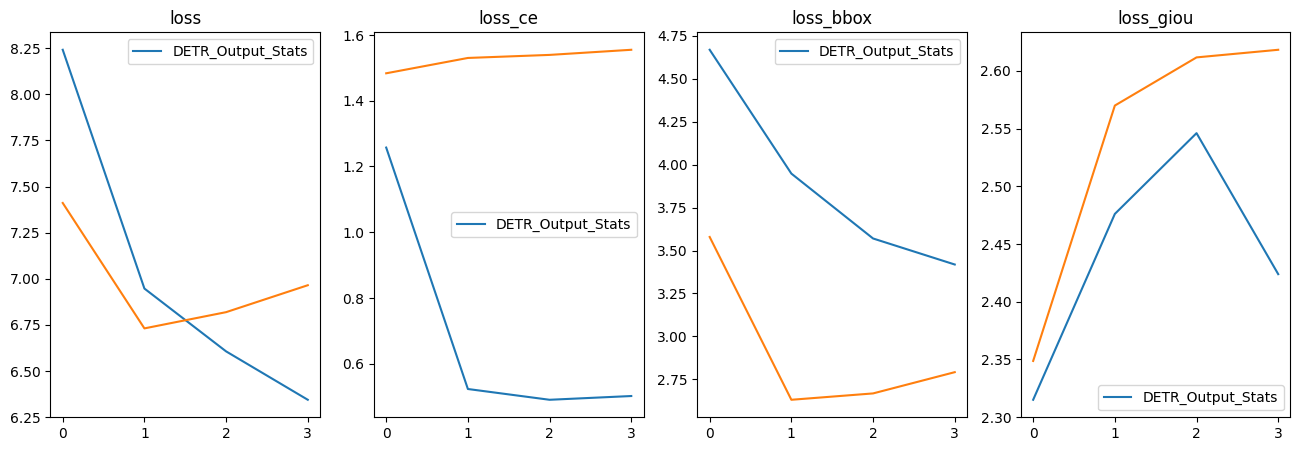

In [32]:
plot_dir = Path(args['output_dir'])
plot_logs([plot_dir],fields=('loss', 'loss_ce', 'loss_bbox', 'loss_giou')) #'class_error',

In [30]:
# COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]